# NAO example notebook

This notebook contains an example of access of a dataset and ERA5 data and evaluation of the NAO teleconnection (station based index) and plot with the diagnostics part of the teleconnections module.

The only import needed is the NAO and PlotNAO classes from the `aqua.diagnostics.teleconnections` module

In [1]:
from aqua.diagnostics.teleconnections import NAO, PlotNAO

# Evaluating the NAO

To simplify the code below we set the two dataset we want to analyse as dictionary here. The syntax is the same as for the `Reader`.

In [5]:
dataset_dict = {
    'catalog': 'climatedt-phase1',
    'model': 'IFS-NEMO',
    'exp': 'historical-1990',
    'source': 'lra-r100-monthly',
}
obs_dict = {
    'catalog': 'obs',
    'model': 'ERA5',
    'exp': 'era5',
    'source': 'monthly',
}
loglevel='info'

# nao_dataset = NAOnao_dataset = NAO(**dataset_dict, **common_dict)
# nao_obs = NAO(**obs_dict, **common_dict)

The initialization requires a minimal set of arguments. All other details can be set while calling the individual methods.

Notice that an instance of the class is required for each dataset.

In [7]:
nao_dataset = NAO(catalog='climatedt-phase1', model='IFS-NEMO', exp='historical-1990', source='lra-r100-monthly', loglevel=loglevel)
nao_obs = NAO(catalog='obs', model='ERA5', exp='era5', source='monthly', loglevel=loglevel)

We first retrieve the data. The needed variable is deduced by the class and it can be modified with YAML file (see `/config/diagnostics/teleconnections/definitions/`)

In [8]:
nao_dataset.retrieve()
nao_obs.retrieve()

2025-05-29 19:42:53 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-05-29 19:42:53 :: Reader :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-05-29 19:42:53 :: Reader :: INFO     -> No fixer_name found, only convention will be applied
2025-05-29 19:42:54 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-05-29 19:42:54 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-05-29 19:42:54 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-05-29 19:43:21 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-05-29 19:43:21 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-05-29 19:43:21 :: Regridder :: INFO     -> Grid name: lon-lat
2025-05-29 19:43:21 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_IFS-NEMO_historical-1990_lra-r10

The index can be computed with a simple method. A months window different from the default (3 months) can be set. The result is stored in the `index` attribute of the class.

In [9]:
nao_dataset.compute_index()
nao_obs.compute_index()

In [10]:
nao_dataset.save_netcdf(nao_dataset.index, diagnostic='nao', diagnostic_product='index')
nao_obs.save_netcdf(nao_obs.index, diagnostic='nao', diagnostic_product='index')

2025-05-29 19:45:26 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-29 19:45:26 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-29 19:45:26 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-29 19:45:26 :: OutputSaver :: INFO     -> NetCDF file successfully saved.


We then evaluate regression and correlation. By default this is done for the entire dataset, but a season can be selected with the `season` argument.
By default the statistics is computed with the same variable as the index, but the `var` argument can be used to ask for another variable.

In [11]:
reg_dataset = nao_dataset.compute_regression(season='DJF')
reg_obs = nao_obs.compute_regression(season='DJF')

In [12]:
cor_dataset = nao_dataset.compute_correlation(season='DJF')
cor_obs = nao_obs.compute_correlation(season='DJF')

Also for these plot we can save the netcdf.

NB: The season will be working when using the new version of the outputnamer class.

In [13]:
nao_dataset.save_netcdf(reg_dataset, diagnostic='nao', diagnostic_product='regression.DJF')
nao_obs.save_netcdf(reg_obs, diagnostic='nao', diagnostic_product='regression.DJF')

2025-05-29 19:47:03 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-29 19:47:03 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-29 19:47:03 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-29 19:50:04 :: OutputSaver :: INFO     -> NetCDF file successfully saved.


In [14]:
nao_dataset.save_netcdf(cor_dataset, diagnostic='nao', diagnostic_product='correlation.DJF')
nao_obs.save_netcdf(cor_obs, diagnostic='nao', diagnostic_product='correlation.DJF')

2025-05-29 19:50:04 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-29 19:50:05 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-29 19:50:05 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-29 19:50:53 :: OutputSaver :: INFO     -> NetCDF file successfully saved.


# Plot the NAO

The `PlotNAO` class will take care of plotting the result of multiple dataset. It will be initialized with just the indexes, specifying what is a dataset and what is the reference to compare against.

The class accept any xarray, but it will use attributes to create labels and other details. It may be needed the creation of new attributes if you want to use results that do not come from AQUA with this plot class.

In [15]:
plot = PlotNAO(loglevel='INFO', indexes=nao_dataset.index,
               ref_indexes=nao_obs.index)

The index plot is done with the `plot_index` method. Multiple panels are generated if multiple dataset are provided.

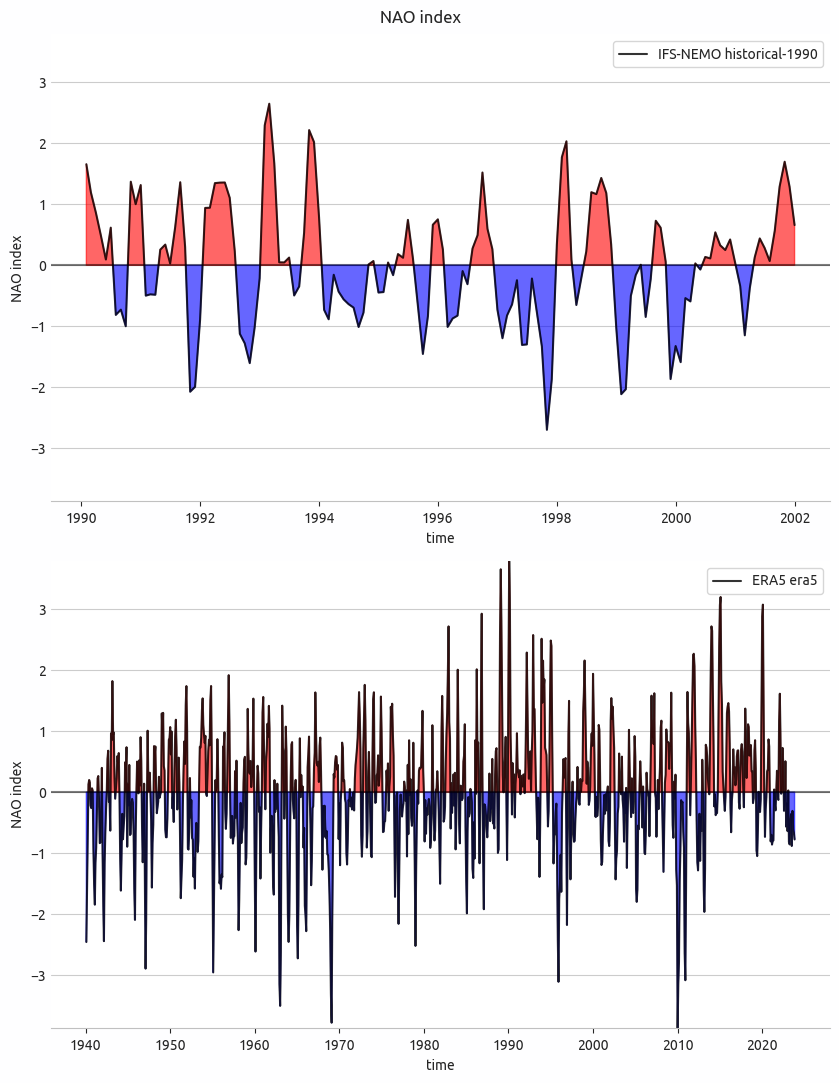

In [11]:
fig_index, _ = plot.plot_index()

We create the caption to be embedded with the metadata of the figure. We save the image as png but pdf is supported as well.

In [ ]:
description = plot.set_index_description()
plot.save_plot(fig_index, diagnostic_product='index', metadata={'description': description})

We strongly suggest to load the regression and correlation datasets before giving them to the plot routines, since cartopy and dask do not perform very well together.

In [12]:
reg_dataset.load()
reg_obs.load()

<xarray.DataArray (lat: 721, lon: 1440)> Size: 8MB
array([[ -47.05626144,  -47.05626144,  -47.05626144, ...,  -47.05626144,
         -47.05626144,  -47.05626144],
       [ -47.01276952,  -47.00805775,  -47.00460882, ...,  -47.02364339,
         -47.01870169,  -47.01850006],
       [ -46.9674877 ,  -46.96370626,  -46.95556324, ...,  -46.98441754,
         -46.97934142,  -46.97402476],
       ...,
       [-227.09557386, -227.09435701, -227.09207895, ..., -227.09802172,
        -227.09877164, -227.09717275],
       [-225.65112591, -225.64976756, -225.64801303, ..., -225.64985246,
        -225.64964022, -225.64941382],
       [-224.53995441, -224.53995441, -224.53995441, ..., -224.53995441,
        -224.53995441, -224.53995441]], shape=(721, 1440))
Coordinates:
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Attributes: (12/14)
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          Pa
    code:           151
    table:          128
    history:        \n2025-05-26 12:01:04 AQUA💧: Variable renamed msl from MS...
    ...             ...
    AQUA_model:     ERA5
    AQUA_exp:       era5
    AQUA_source:    monthly
    AQUA_catalog:   obs
    AQUA_version:   0.14.1-alpha
    AQUA_season:    DJF

Here we show an example of plot flow. The first method will create the figure and it will be enough for the notebook usage.
However a description to be stored as metadata and a saving routine are available and shown in the following example.

2025-05-26 12:03:01 :: create_folder :: INFO     -> Folder ./png already exists
2025-05-26 12:03:03 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/nao.regression.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-26 12:03:03 :: OutputSaver :: INFO     -> Saved PNG: ./png/nao.regression.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png


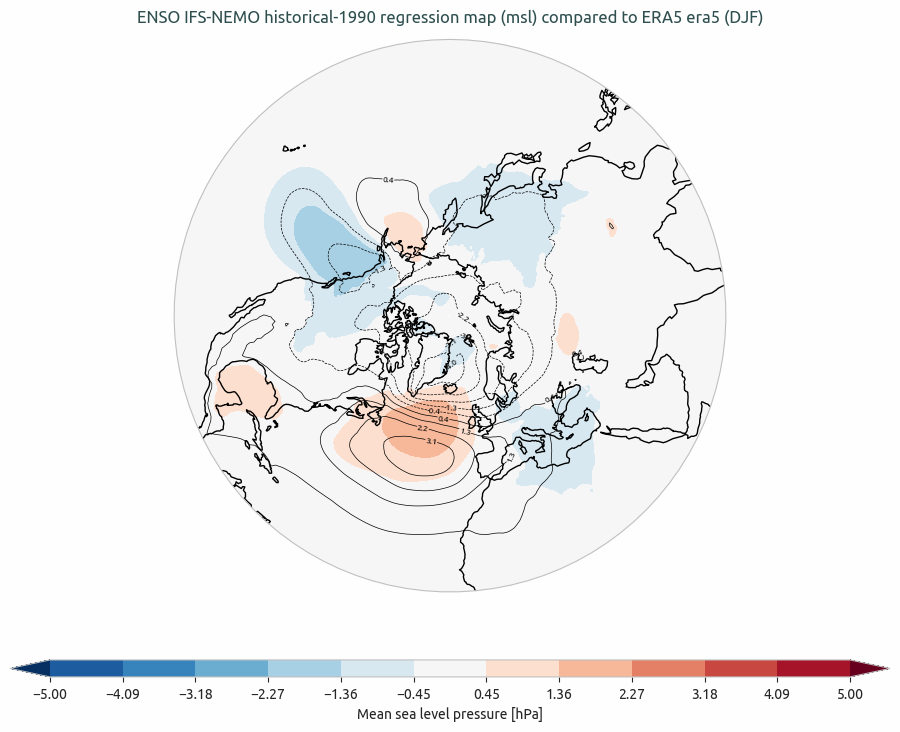

In [13]:
fig_reg = plot.plot_maps(maps=reg_dataset, ref_maps=reg_obs, statistic='regression')
description = plot.set_map_description(maps=reg_dataset, ref_maps=reg_obs, statistic='regression')
plot.save_plot(fig_reg, diagnostic_product='regression', metadata={'description': description})

In [14]:
cor_dataset.load()
cor_obs.load()

<xarray.DataArray (lat: 721, lon: 1440)> Size: 4MB
array([[-0.13290316, -0.13290316, -0.13290316, ..., -0.13290316,
        -0.13290316, -0.13290316],
       [-0.13363007, -0.13362078, -0.13361646, ..., -0.13364783,
        -0.13363859, -0.13364115],
       [-0.13345139, -0.13344346, -0.13342842, ..., -0.13348722,
        -0.1334785 , -0.13346791],
       ...,
       [-0.4533697 , -0.45334616, -0.4533203 , ..., -0.45344764,
        -0.4534243 , -0.45339793],
       [-0.44940394, -0.44939086, -0.44937655, ..., -0.44943738,
        -0.44942337, -0.4494115 ],
       [-0.44533253, -0.44533253, -0.44533253, ..., -0.44533253,
        -0.44533253, -0.44533253]], shape=(721, 1440), dtype=float32)
Coordinates:
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Attributes: (12/14)
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Correlation of Mean sea level pressure with Mean sea leve...
    units:          1
    code:           151
    table:          128
    history:        \n2025-05-26 12:01:04 AQUA💧: Variable renamed msl from MS...
    ...             ...
    AQUA_model:     ERA5
    AQUA_exp:       era5
    AQUA_source:    monthly
    AQUA_catalog:   obs
    AQUA_version:   0.14.1-alpha
    AQUA_season:    DJF

2025-05-26 12:03:44 :: create_folder :: INFO     -> Folder ./png already exists
2025-05-26 12:03:45 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/nao.correlation.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png
2025-05-26 12:03:45 :: OutputSaver :: INFO     -> Saved PNG: ./png/nao.correlation.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.png


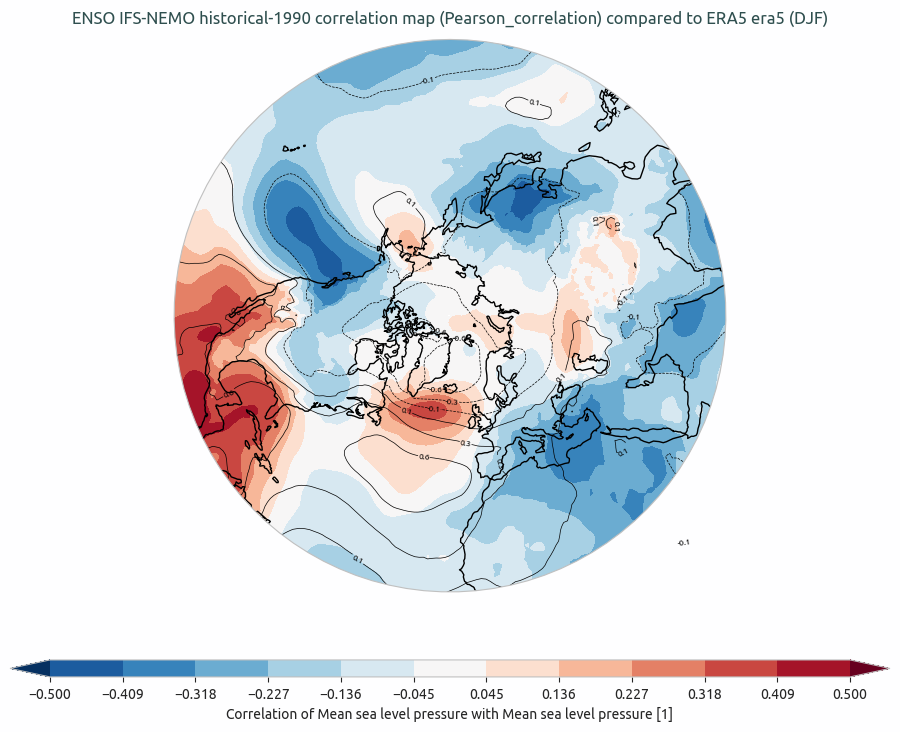

In [15]:
fig_cor = plot.plot_maps(maps=cor_dataset, ref_maps=cor_obs, statistic='correlation')
description = plot.set_map_description(maps=cor_dataset, ref_maps=cor_obs, statistic='correlation')
plot.save_plot(fig_cor, diagnostic_product='correlation', metadata={'description': description})

# NCAR comparison

With the NAO index computed, we can compare with observational data from NCAR, to check if the index is computed correctly. NCAR data are available in the data folder available in this same folder.

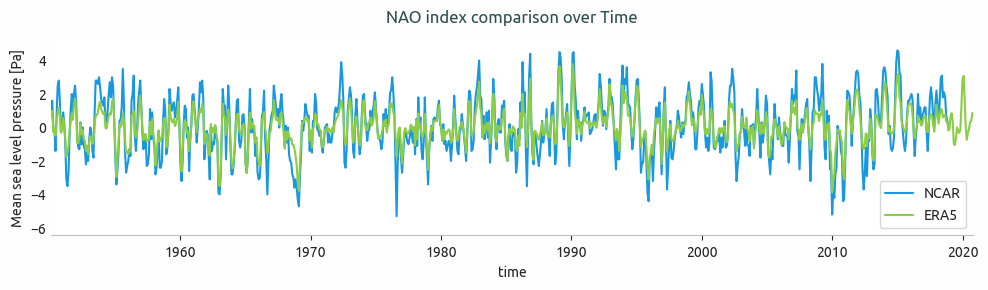

In [17]:
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

ncar_path = 'data/nao_station_seasonal.txt'
nao_ncar = np.genfromtxt(ncar_path,skip_header=3,skip_footer=4)

year = nao_ncar[:,0]
month_data = nao_ncar[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='MS',calendar='standard')
month_data = month_data.reshape(-1)
nao_ncar = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,3))
plt.plot(datetimes, nao_ncar.values,label='NCAR')

plt.xlim(datetime.datetime(1950, 1, 31, 0, 0),datetime.datetime(2020, 10, 31, 0, 0))

nao_obs.index.plot(label='ERA5')
plt.legend()
plt.title('NAO index comparison over Time')
fig.tight_layout()

plt.show()